<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/GAN_FingerPrint_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.model_selection import train_test_split
import random
import numpy as np
# from keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from PIL import Image
from keras.layers import *
from keras.models import Sequential , Model
from tensorflow.keras.layers import LeakyReLU
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Input , Dropout

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d peace1019/fingerprint-dataset-for-fvc2000-db4-b

 93% 24.0M/25.9M [00:00<00:00, 56.8MB/s]
100% 25.9M/25.9M [00:00<00:00, 51.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/fingerprint-dataset-for-fvc2000-db4-b.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
dir_path = '/content/dataset_FVC2000_DB4_B/dataset/train_data'

In [ ]:
fp_list = os.listdir('/content/dataset_FVC2000_DB4_B/dataset/train_data')


In [ ]:
len(fp_list)

800

In [ ]:
def get_random_image():
    j = random.randint(0, len(fp_list))
    im_pth = os.path.join(dir_path,fp_list[j] )
    rd_img = imread(im_pth)
    plt.imshow(rd_img, cmap = 'gray', vmin = 0 , vmax = 255)
    fp_img = Image.open((im_pth))
    arr = np.asarray(fp_img)
    print(arr.shape)

(160, 160)


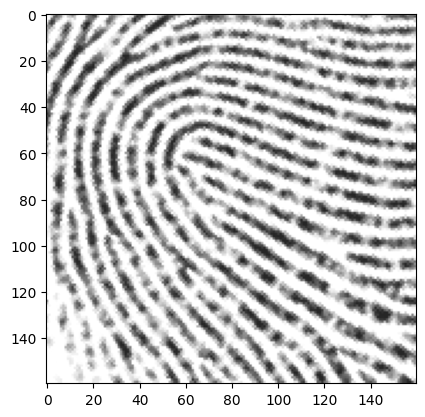

In [ ]:
get_random_image()

In [ ]:
X_train = []
i = 0
for fp in fp_list:
  fp_path =  os.path.join(dir_path, fp_list[i])
  fp_img = imread(fp_path)
  fp_img = Image.open((fp_path))
  fp_arr = np.asarray(fp_img)
  X_train.append(fp_arr)
  i+=1
  print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
X_train = np.asarray(X_train)

In [ ]:
X_train.shape

(800, 160, 160)

In [ ]:
generator  = Sequential ( )
generator.add(Dense(units = 40*40*256 ,input_shape = (NOISE_DIM ,) ))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(Reshape((40,40,256)))
assert generator.output_shape == (None , 40,40,256) #assert model.output_shape = (shape , you , want )

generator.add(Conv2DTranspose(128, (3,3), strides = (1,1), padding = 'same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
assert generator.output_shape == (None ,40,40,128)

generator.add(Conv2DTranspose(64, (3,3), strides = (2,2), padding = 'same'))
assert generator.output_shape == (None ,80,80,64)
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(1 , (3,3), strides = (2,2), padding = 'same', activation = 'tanh'))
assert generator.output_shape == (None ,160,160,1)
generator.compile(loss = keras.losses.binary_crossentropy ,optimizer= adam)

In [ ]:
generator.summary()

In [ ]:
noise = tf.random.normal([1,100])
generated_img  =  generator(noise, training = False)
plt.imshow(generated_img[0,:,:,0])

In [ ]:
TOTAL_EPOCH  = 50
BATCH_SIZE = 256
HALF_BATCH = 128
BUFFER_SIZE = 60000
NO_OF_BATCHES = int(X_train.shape[0]/BATCH_SIZE)
# NO_OF_BATCHES = int(X_tr.shape[0]/BATCH_SIZE)
NOISE_DIM = 100
adam = Adam(lr  = 2e-4 ,beta_1 = 0.5 )

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
descriminator = Sequential()
descriminator.add(Conv2D(1, (1,1) , strides = (1,1), padding = 'same' ,input_shape = (160,160,1)))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Conv2D(64, (3,3) , strides = (2,2), padding = 'same' ))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Conv2D(128, (3,3) , strides = (2,2), padding = 'same'))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Conv2D(256, (1,1) , strides = (1,1), padding = 'same'))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Flatten())
descriminator.add(Dense(100))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Dense(1, activation = 'sigmoid'))
descriminator.compile(loss = keras.losses.binary_crossentropy, optimizer= adam)

In [ ]:
descriminator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 160, 160, 1)       2         
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 160, 160, 1)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 80, 80, 64)        640       
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 80, 80, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 40, 40, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 40, 40, 256)      

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam as ADAM

In [ ]:
descriminator.trainable = False

gan_input = Input(shape = (NOISE_DIM,))

generated_img = generator(gan_input)

gan_output = descriminator(generated_img)

model = Model(gan_input, gan_output)

model.compile(loss= keras.losses.binary_crossentropy, optimizer = adam)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_4 (Sequential)   (None, 160, 160, 1)       43378177  
                                                                 
 sequential_6 (Sequential)   (None, 1)                 41067723  
                                                                 
Total params: 84445900 (322.14 MB)
Trainable params: 42558593 (162.35 MB)
Non-trainable params: 41887307 (159.79 MB)
_________________________________________________________________


In [ ]:
X_tra = X_train.reshape(-1,160,160,1)

In [ ]:
X_tra.shape

(800, 160, 160, 1)

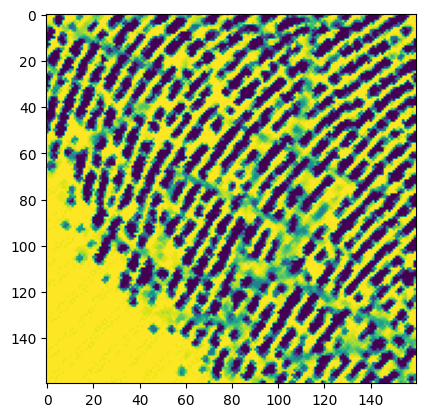

In [ ]:
plt.imshow(X_tra[0])

In [ ]:
def display_image(sample = 25):
 noise  =  np.random.normal(0,1,size = (sample, NOISE_DIM))
 generated_img = generator.predict(noise)
 plt.figure(figsize = (10,10))
 for i in range(sample):
  plt.subplot(5,5,i+1)
  plt.imshow(generated_img[i].reshape(160,160,1) , cmap= 'binary')
  plt.axis ('off')

 plt.show()

In [ ]:
d_losses = []
g_losses = []

for epoch in range(100):
  epoch_d_loss = 0.0
  epoch_g_loss = 0.0
  for step in range(NO_OF_BATCHES):

    descriminator.trainable = True
    idx = np.random.randint(0,800,HALF_BATCH )
    real_img = X_tra[idx]

    noise  = np.random.normal(0,1 ,size = (HALF_BATCH, NOISE_DIM))
    fake_img = generator.predict(noise)

    real_y = np.ones((HALF_BATCH ,1 ))*0.9
    fake_y = np.zeros((HALF_BATCH ,1))

    d_loss_real = descriminator.train_on_batch(real_img, real_y)
    d_loss_fake = descriminator.train_on_batch(fake_img, fake_y)

    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

#  ...........

    descriminator.trainable = False

    noise  = np.random.normal(0,1 , size = (BATCH_SIZE ,  NOISE_DIM))
    g_truth_y  = np.ones((BATCH_SIZE , 1))

    if g_truth_y is type(None):
      print("true")
    g_loss = model.train_on_batch(noise,g_truth_y )
    epoch_g_loss += g_loss

    print (f"Epoch{epoch+1}, Disc loss {epoch_d_loss / NO_OF_BATCHES} , Generator loss{ epoch_g_loss/NO_OF_BATCHES}")
    d_losses.append(epoch_d_loss / NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)

    if (epoch + 1 )% 10 == 0:
      print(epoch)
      generator.save("generator.h5")
      display_image()

In [ ]:


noise  = np.random.normal(0,1 , size = (BATCH_SIZE ,  NOISE_DIM) )
g_truth_y  = np.ones((BATCH_SIZE , 100))
print(noise.shape)
print(g_truth_y.shape)

(256, 100)
(256, 100)


In [ ]:
real_y = np.ones((HALF_BATCH ,1 ))*0.9

In [ ]:
real_y.shape

(100, 1)

In [ ]:
real_img = X_tra[4]
real_img.shape

(160, 160, 1)

In [ ]:
noise  = np.random.normal(0,1 , size = (BATCH_SIZE ,  NOISE_DIM))